<a href="https://colab.research.google.com/github/AmitheshKumarEMC2/AmitheshKumarEMC2/blob/main/PlanetaryCoords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [181]:
!pip install ephem

In [182]:
import ephem as eph
import matplotlib.pyplot as plt
from pytz import timezone as tz
from datetime import datetime as dt
from math import pi

In [183]:
def getLocat():
  lati = input("Latitude:  ")
  loni = input("Longitude: ")
  ele = float(input("Elevation: "))
  locat = eph.Observer()
  locat.lat = lati
  locat.lon = loni
  locat.elev = ele
  global strTime
  strTime = input("yyyy/mm/dd hh:mm:ss: ")
  localDT = str(dt.strptime(strTime,'%Y/%m/%d %H:%M:%S'))
  global userTz
  userTz = tz(input("Pytz tz: "))
  datetimeobj = userTz.localize(dt.strptime(localDT,'%Y-%m-%d %H:%M:%S'))
  locat.date = datetimeobj
  return locat

In [184]:
locat = getLocat()

Latitude:  13.0843
Longitude: 80.2705
Elevation: 10
yyyy/mm/dd hh:mm:ss: 2024/06/03 05:15:00
Pytz tz: Asia/Kolkata


In [185]:
def getData() -> list:
  me = eph.Mercury(locat)
  ve = eph.Venus(locat)
  mo = eph.Moon(locat)
  ma = eph.Mars(locat)
  ju = eph.Jupiter(locat)
  sa = eph.Saturn(locat)
  ur = eph.Uranus(locat)
  ne = eph.Neptune(locat)
  planet_list = [me,ve,mo,ma,ju,sa,ur,ne]
  return planet_list

In [186]:
data = getData()

In [187]:
def AzAlt()->list:
  azs = []
  alts = []
  for pl in data:
    azs.append(str(pl.az))
    alts.append(str(pl.alt))
  azalts = []
  for i in range(len(azs)):
    azalts.append([azs[i],alts[i]])
  return azalts

In [188]:
def EcLatLon() -> list:
  lats = []
  lons = []
  for pl in data:
    ecl = eph.Ecliptic(pl)
    lats.append(str(ecl.lat))
    lons.append(str(ecl.lon))
  latlongs = []
  for i in range(len(lats)):
    latlongs.append([lats[i],lons[i]])
  return latlongs

In [189]:
print("Azimuth/Altitude: ")
print('*'*50)
n = ["Me","V","Mo","Ma","J","S","U","N"]
for i in range(len(n)):
  print(f'{n[i]}\t\t{(eph.degrees(AzAlt()[i][0]))}\t{eph.degrees(AzAlt()[i][1])}')
  print('*'*50)

Azimuth/Altitude: 
**************************************************
Me		71:42:50.7	5:20:28.6
**************************************************
V		65:26:33.6	-6:14:23.3
**************************************************
Mo		85:32:02.7	34:57:28.5
**************************************************
Ma		88:31:00.1	35:27:23.5
**************************************************
J		70:20:07.2	3:15:59.0
**************************************************
S		129:59:35.5	60:53:30.5
**************************************************
U		73:05:25.2	10:13:50.1
**************************************************
N		112:07:35.6	55:22:57.2
**************************************************


In [190]:
print("Latitude/Longitude(Ecliptic):")
print('*'*50)
for i in range(len(n)):
  print(f"{n[i]}\t\t{EcLatLon()[i][0]}\t{EcLatLon()[i][1]}")
  print('*'*50)

Latitude/Longitude(Ecliptic):
**************************************************
Me		-1:05:04.1	59:01:24.1
**************************************************
V		-0:07:40.3	72:07:26.3
**************************************************
Mo		1:05:10.1	25:59:12.6
**************************************************
Ma		-1:09:50.0	25:02:10.9
**************************************************
J		-0:43:02.6	61:32:43.4
**************************************************
S		-1:51:55.4	348:29:50.7
**************************************************
U		-0:15:51.6	53:56:58.9
**************************************************
N		-1:15:21.0	359:21:36.7
**************************************************


In [191]:
def getDec(data):
  newData = [[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]]
  for i in range(len(data)):
    for j in range(len(data[i])):
      newData[i][j] = float(eph.degrees(data[i][j])) * (180/pi)
  return newData

In [192]:
formatAzs = getDec(AzAlt())
formatEcl = getDec(EcLatLon())

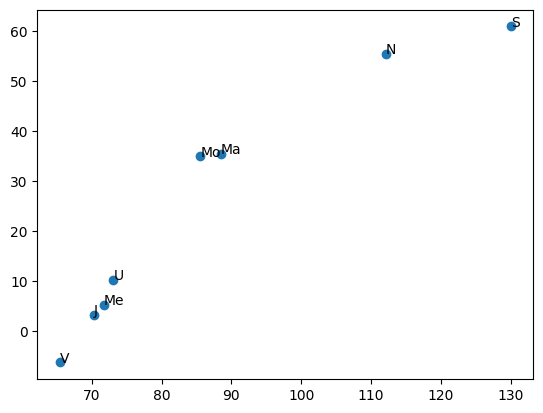

In [193]:
#azimuthal
xl = []
yl = []
for i in range(len(formatAzs)):
  xl.append(formatAzs[i][0])
  yl.append(formatAzs[i][1])
plt.scatter(xl,yl)
for i,txt in enumerate(n):
  plt.annotate(txt,(xl[i],yl[i]))
plt.show()

In [194]:
!pip install skyfield

In [195]:
import numpy
import skyfield.api as sky
from skyfield.framelib import ecliptic_frame

In [196]:
lats = []
for i in range(len(formatEcl)):
  lats.append(formatEcl[i][1])

In [197]:
nj = eph.Date(locat.date)
nj = str(nj)
nj = dt.strptime(nj,'%Y/%m/%d %H:%M:%S')
ts = sky.load.timescale()
e = userTz.localize(nj)
t = ts.from_datetime(e)

In [198]:
planets = sky.load('de421.bsp')
earth = planets['earth']
mercury = planets['mercury']
venus = planets['venus']
mars = planets['mars']
jupiter = planets['jupiter barycenter']
saturn = planets['saturn barycenter']
uranus = planets['uranus barycenter']
neptune = planets['neptune barycenter']

In [199]:
dis = []
astrometrics = []
mypl = [mercury,venus,earth,mars,jupiter,saturn,uranus,neptune]
sun = planets['sun']
for i in range(len(n)):
  astrometrics.append(sun.at(t).observe(mypl[i]))
for metric in astrometrics:
  lath,lonh,dish = metric.frame_latlon(ecliptic_frame)
  dis.append(float(format(dish.au)))

In [200]:
earthLat, _,__ = sun.at(t).observe(earth).frame_latlon(ecliptic_frame)
earthLat = float(format(earthLat.degrees))
lats = []
for i in range(len(formatEcl)):
  if i != 2:
    lats.append(formatEcl[i][1])
  else:
    lats.append(earthLat)

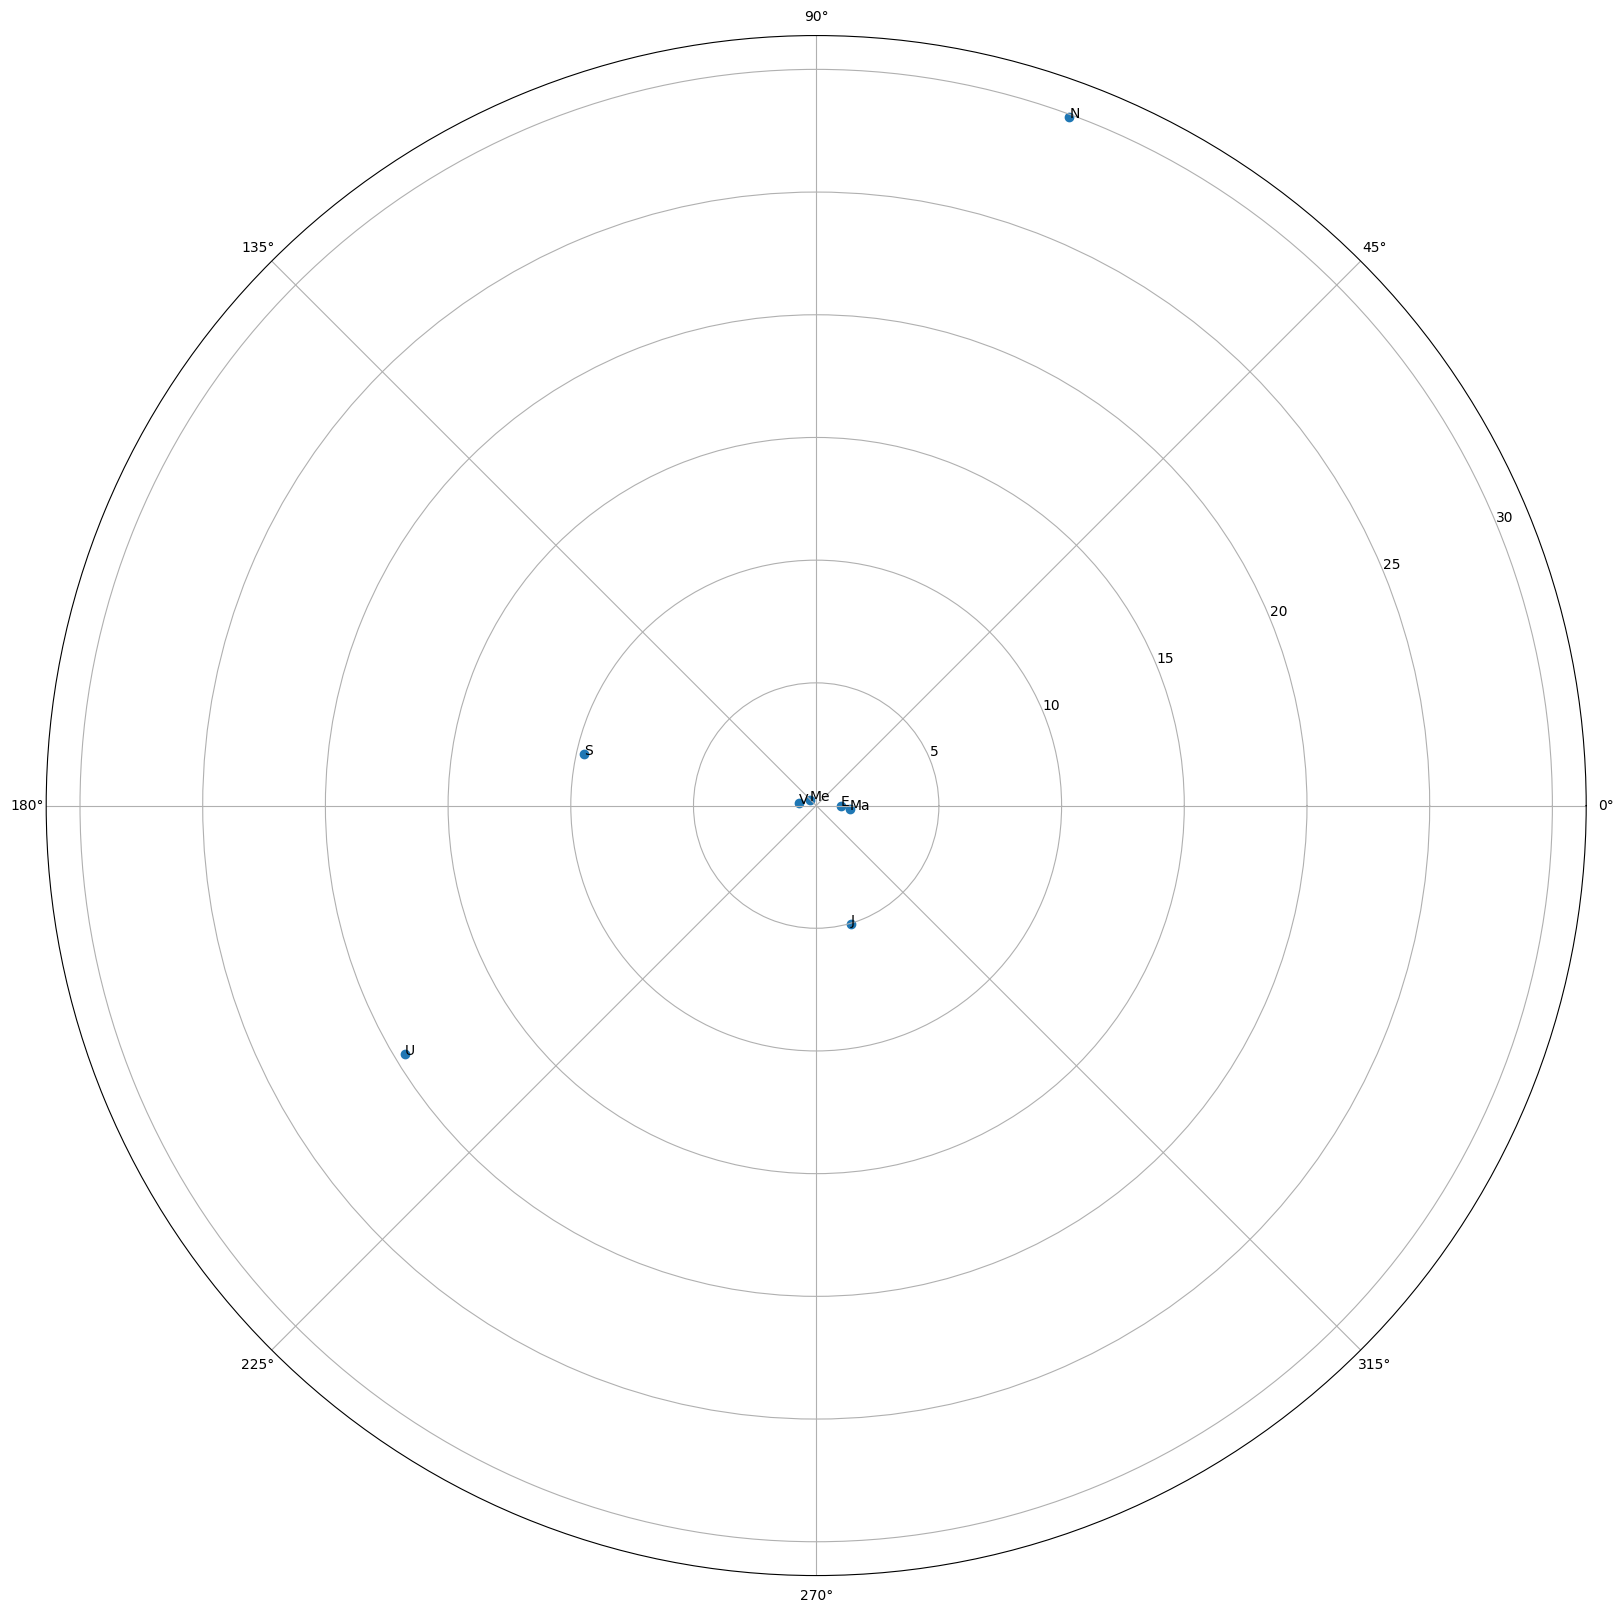

In [201]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(projection = 'polar')
c = ax.scatter(lats,dis)
m = n.copy()
m[2] = 'E'
for i,txt in enumerate(m):
  ax.annotate(txt,(lats[i],dis[i]))

Planetary alignment: True




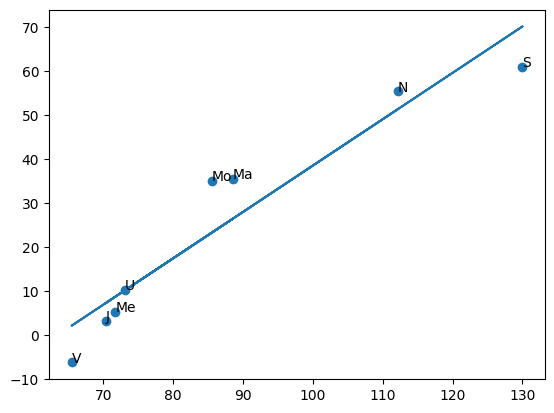

In [202]:
a, b = numpy.polyfit(xl, yl, 1)
plt.scatter(xl,yl)
bestfit = []
for i in xl:
  bestfit.append(a*i+b)
maxVar = 0
Var = []
for j in range(len(bestfit)):
  var = abs(bestfit[j] - yl[j])
  Var.append(var)
maxVar = max(Var)
isPlanetaryAlignment = f"Planetary alignment: {maxVar <= 12}"
print(isPlanetaryAlignment)
print("\n")
for i, txt in enumerate(n):
  plt.annotate(txt, (xl[i],yl[i]))
plt.plot(xl, bestfit)
plt.show()

In [203]:
#is solar eclipse
day = dt.strptime("07:00:00","%H:%M:%S") <= dt.strptime((f'{nj.hour}:{nj.minute}:{nj.second}'),"%H:%M:%S") <= dt.strptime("17:45:00","%H:%M:%S")
sun, moon = eph.Sun(locat), eph.Moon(locat)
sp = ((sun.az - moon.az)**2 + (sun.alt - moon.alt)**2)**0.5
if sp < 0.5 and day: #minimum angualar distance between sun and moon to not be a eclipse = 0.5
  print("Solar eclipse: True")
else:
  print("Solar eclipse: False")

Solar eclipse: False


In [204]:
#is lunar eclipse
sp = ((sun.az-moon.az)**2 + (sun.alt-moon.alt)**2)**0.5
if (3.5 >= round(sp,1) >= 3.4) and not day:
  print("Lunar eclipse: True")
else:
  print("Lunar eclipse: False")

Lunar eclipse: False
